In [1]:
#slopes plot extracted from txt files
import numpy as np
import yt
import time
from yt.funcs import mylog
import matplotlib.pyplot as plt
mylog.setLevel(40) #prevents warning
plt.style.use('default')
import scipy
from scipy import optimize
import pandas as pd

In [2]:
#importing timing and other files
inputfile = ('slope_0%.txt','slope_1%.txt','slope_2%.txt','slope_3%.txt','slope_4%.txt','slope_5%.txt')#,'slope_10%_and_6%.txt',)
time_file = pd.read_csv("Time_conversions.csv")
times = time_file['time']
times = times*3.71e-14   #convert seconds to Myear
time_gtmp =times[0:6]
time_gtmp = time_gtmp-time_gtmp[0]
time_gtm = times[7:13]
time_gtm = time_gtm-time_gtm[7]
time_gt = times[14:20]
time_gt = time_gt-time_gt[14]
time_g = times[21:27]
time_g = time_g-time_g[21]

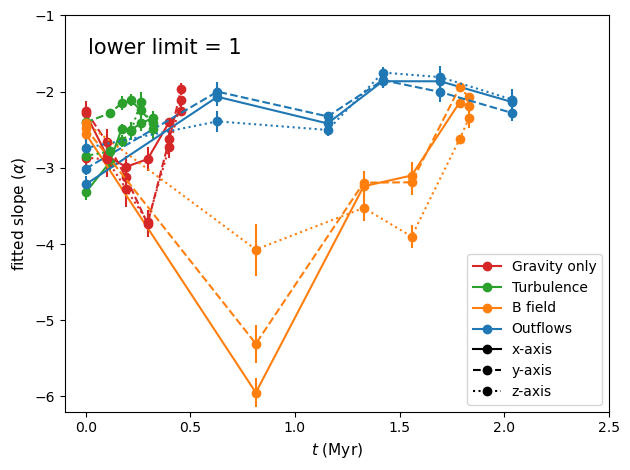

In [6]:
#main plotting cell
line = ('solid', 'dashed', 'dotted')
#inputfile = ('txt_file_storage/slope_0%_lim,5.txt','txt_file_storage/slope_1%_lim,5.txt','txt_file_storage/slope_2%_lim,5.txt','txt_file_storage/slope_3%_lim,5.txt','txt_file_storage/slope_4%_lim,5.txt','txt_file_storage/slope_5%_lim,5.txt')#,'slope_10%_and_6%.txt',)
inputfile = ('txt_file_storage/slope_0%_lim1.txt','txt_file_storage/slope_1%_lim1.txt','txt_file_storage/slope_2%_lim1.txt','txt_file_storage/slope_3%_lim1.txt','txt_file_storage/slope_4%_lim1.txt','txt_file_storage/slope_5%_lim1.txt')

plt.annotate('lower limit = 1',[.01,-1.5], size =15)

for a in range(3):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
    error_x_g = []
    error_x_gt = []
    error_x_gtm = []
    error_x_gtmp = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_g.append(slope_list[0+a])
        slope_x_gt.append(slope_list[3+a])
        slope_x_gtm.append(slope_list[6+a])
        slope_x_gtmp.append(slope_list[9+a])
        #error bar cutting
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[1]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        error_x_g.append(slope_list[0+a])
        error_x_gt.append(slope_list[3+a])
        error_x_gtm.append(slope_list[6+a])
        error_x_gtmp.append(slope_list[9+a])
        
    plt.errorbar(time_g,slope_x_g,yerr = error_x_g, marker = "o", color = 'C3', linestyle = line[a])#, alpha =alpha[a])
    plt.errorbar(time_gt,slope_x_gt,yerr = error_x_gt, marker = "o", color = 'C2', linestyle = line[a])#, alpha =alpha[a])
    plt.errorbar(time_gtm,slope_x_gtm,yerr = error_x_gtm, marker = "o", color = 'C1', linestyle = line[a])#, alpha =alpha[a])
    plt.errorbar(time_gtmp,slope_x_gtmp,yerr = error_x_gtmp, marker = "o", color = 'C0', linestyle = line[a])#, alpha =alpha[a])
    #Invisible lines to fix legend
    plt.plot(0,0, marker = "o", color = 'C3', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'C2', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'C1', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'C0', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'black', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'black', linestyle = line[1])
    plt.plot(0,0, marker = "o", color = 'black', linestyle = line[2])
    #plot bells and whistles
    #plt.title('Fitted Slope V.S. time', size = 15)
    plt.xlabel(r'$t$ (Myr)', size=11)
    plt.ylabel(r'fitted slope ($\alpha$)', size=11)
    plt.ylim(-6.2,-1)
    plt.xlim(-.1,2.5)
    plt.legend(['Gravity only', 'Turbulence', 'B field', 'Outflows', 'x-axis','y-axis','z-axis'])
    plt.tight_layout()
#plt.plot((0,1,2),(-2,-2,-2), color='black')
plt.savefig('cdensity_slope_plot_lim1')


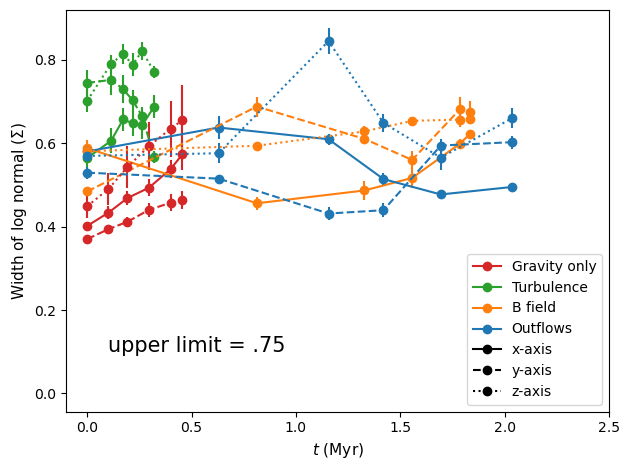

In [3]:
#main plotting cell
line = ('solid', 'dashed', 'dotted')
plt.annotate('upper limit = .75',[.1,.1], size =15)
#inputfile = ('txt_file_storage/sigma_0%.txt','txt_file_storage/sigma_1%.txt','txt_file_storage/sigma_2%.txt','txt_file_storage/sigma_3%.txt','txt_file_storage/sigma_4%.txt','txt_file_storage/sigma_5%.txt')
inputfile = ('txt_file_storage/sigma_0%_lim75.txt','txt_file_storage/sigma_1%_lim75.txt','txt_file_storage/sigma_2%_lim75.txt','txt_file_storage/sigma_3%_lim75.txt','txt_file_storage/sigma_4%_lim75.txt','txt_file_storage/sigma_5%_lim75.txt')

for a in range(3):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
    error_x_g = []
    error_x_gt = []
    error_x_gtm = []
    error_x_gtmp = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_g.append(slope_list[0+a])
        slope_x_gt.append(slope_list[3+a])
        slope_x_gtm.append(slope_list[6+a])
        slope_x_gtmp.append(slope_list[9+a])
        #error bar cutting
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[1]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        error_x_g.append(slope_list[0+a])
        error_x_gt.append(slope_list[3+a])
        error_x_gtm.append(slope_list[6+a])
        error_x_gtmp.append(slope_list[9+a])
        
    plt.errorbar(time_g,slope_x_g,yerr = error_x_g, marker = "o", color = 'C3', linestyle = line[a])#, alpha =alpha[a])
    plt.errorbar(time_gt,slope_x_gt,yerr = error_x_gt, marker = "o", color = 'C2', linestyle = line[a])#, alpha =alpha[a])
    plt.errorbar(time_gtm,slope_x_gtm,yerr = error_x_gtm, marker = "o", color = 'C1', linestyle = line[a])#, alpha =alpha[a])
    plt.errorbar(time_gtmp,slope_x_gtmp,yerr = error_x_gtmp, marker = "o", color = 'C0', linestyle = line[a])#, alpha =alpha[a])
    #Invisible lines to fix legend
    plt.plot(10,0, marker = "o", color = 'C3', linestyle = line[0])
    plt.plot(10,0, marker = "o", color = 'C2', linestyle = line[0])
    plt.plot(10,0, marker = "o", color = 'C1', linestyle = line[0])
    plt.plot(10,0, marker = "o", color = 'C0', linestyle = line[0])
    plt.plot(10,0, marker = "o", color = 'black', linestyle = line[0])
    plt.plot(10,0, marker = "o", color = 'black', linestyle = line[1])
    plt.plot(10,0, marker = "o", color = 'black', linestyle = line[2])
    #plot bells and whistles
    #plt.title('Log Normal Sigma V.S. Time', size = 15)
    plt.xlabel(r'$t$ (Myr)', size=11)
    plt.ylabel(r'Width of log normal ($\Sigma$)', size=11)
    #plt.ylim( -5.5,-1.8)
    plt.xlim(-.1,2.5)
    plt.legend(['Gravity only', 'Turbulence', 'B field', 'Outflows', 'x-axis','y-axis','z-axis'], loc = 'lower right')
    plt.tight_layout()
plt.savefig('cdensity_sigma_plot_lim,75')


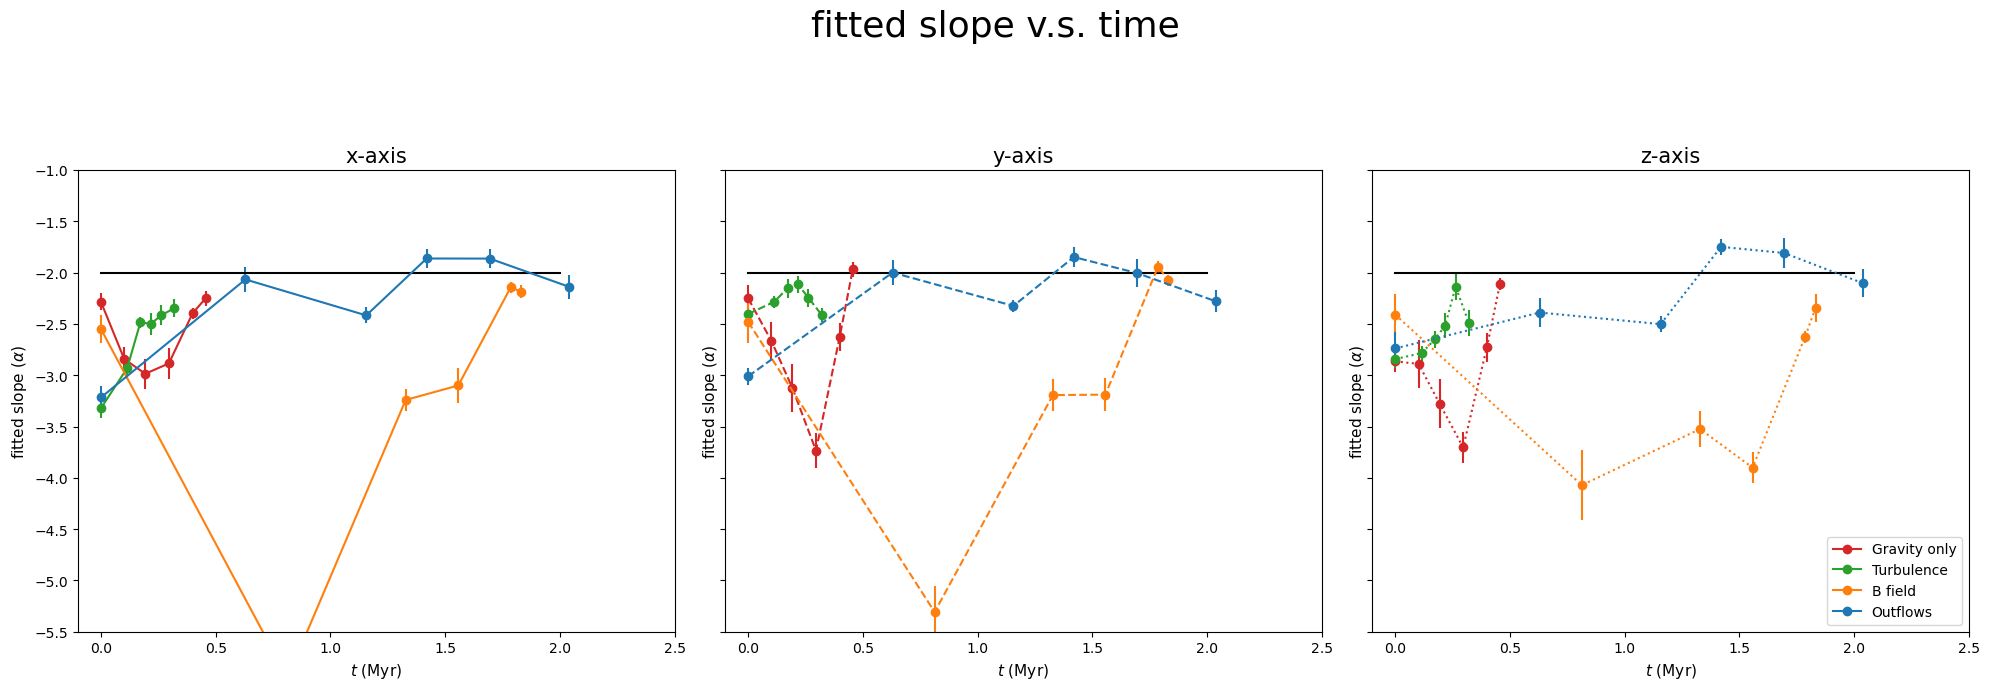

In [8]:
#slope subplot version
#main plotting cell
line = ('solid', 'dashed', 'dotted')
#inputfile = ('slope_0%.txt','slope_1%.txt','slope_2%.txt','slope_3%.txt','slope_4%.txt','slope_5%.txt')#,'slope_10%_and_6%.txt',)
inputfile = ('txt_file_storage/slope_0%_lim1.txt','txt_file_storage/slope_1%_lim1.txt','txt_file_storage/slope_2%_lim1.txt','txt_file_storage/slope_3%_lim1.txt','txt_file_storage/slope_4%_lim1.txt','txt_file_storage/slope_5%_lim1.txt')

fig, ax = plt.subplots(nrows=1,ncols=3, sharex=True, sharey=True,figsize=(20,7))
ax =ax.ravel()
plt.suptitle('fitted slope v.s. time', size =26)
ax[0].annotate('lower limit = 1',[.1,.1], size =15)
titles = ['x-axis', 'y-axis','z-axis']
for a in range(3):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
    error_x_g = []
    error_x_gt = []
    error_x_gtm = []
    error_x_gtmp = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_g.append(slope_list[0+a])
        slope_x_gt.append(slope_list[3+a])
        slope_x_gtm.append(slope_list[6+a])
        slope_x_gtmp.append(slope_list[9+a])

        
    ax[a].plot(time_g,slope_x_g, marker = "o", color = 'C3', linestyle = line[a])#, alpha =alpha[a])
    ax[a].plot(time_gt,slope_x_gt, marker = "o", color = 'C2', linestyle = line[a])#, alpha =alpha[a])
    ax[a].plot(time_gtm,slope_x_gtm, marker = "o", color = 'C1', linestyle = line[a])#, alpha =alpha[a])
    ax[a].plot(time_gtmp,slope_x_gtmp, marker = "o", color = 'C0', linestyle = line[a])#, alpha =alpha[a])
    #Invisible lines to fix legend
    plt.plot(0,0, marker = "o", color = 'C3', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'C2', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'C1', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'C0', linestyle = line[0])

    #plot bells and whistles
    ax[a].set_title(titles[a], size = 15)
    ax[a].set_xlabel(r'$t$ (Myr)', size=11)
    ax[a].set_ylabel(r'fitted slope ($\alpha$)', size=11)
    ax[a].set_ylim(-5.5,-1)
    ax[a].set_xlim(-.1,2.5)
    ax[a].plot((0,1,2),(-2,-2,-2), color = 'black')
    plt.legend(['Gravity only', 'Turbulence', 'B field', 'Outflows'], loc = 'lower right')
plt.tight_layout()
plt.subplots_adjust(top=.75)
plt.savefig('cdensity_slope_plot_lim1')


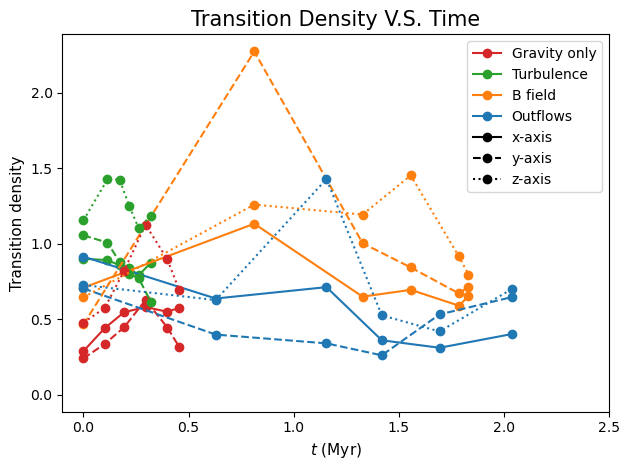

In [5]:
#main plotting cell transition density
line = ('solid', 'dashed', 'dotted')
#plt.annotate('upper limit = .75',[.1,-.1], size =15)
inputfile = ('txt_file_storage/slope_0%_lim1.txt','txt_file_storage/slope_1%_lim1.txt','txt_file_storage/slope_2%_lim1.txt','txt_file_storage/slope_3%_lim1.txt','txt_file_storage/slope_4%_lim1.txt','txt_file_storage/slope_5%_lim1.txt')#,'slope_10%_and_6%.txt',)
inputsigma = ('txt_file_storage/sigma_0%_lim75.txt','txt_file_storage/sigma_1%_lim75.txt','txt_file_storage/sigma_2%_lim75.txt','txt_file_storage/sigma_3%_lim75.txt','txt_file_storage/sigma_4%_lim75.txt','txt_file_storage/sigma_5%_lim75.txt')
plt.plot(10,0, marker = "o", color = 'C3', linestyle = line[0])
plt.plot(10,0, marker = "o", color = 'C2', linestyle = line[0])
plt.plot(10,0, marker = "o", color = 'C1', linestyle = line[0])
plt.plot(10,0, marker = "o", color = 'C0', linestyle = line[0])
plt.plot(10,0, marker = "o", color = 'black', linestyle = line[0])
plt.plot(10,0, marker = "o", color = 'black', linestyle = line[1])
plt.plot(10,0, marker = "o", color = 'black', linestyle = line[2])
for a in range(3):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
#    error_x_g = []
#    error_x_gt = []
#    error_x_gtm = []
#    error_x_gtmp = []
    sigma_x_g = []
    sigma_x_gt = []
    sigma_x_gtm = []
    sigma_x_gtmp = []
#    error_x_g = []
#    error_x_gt = []
#    error_x_gtm = []
#    error_x_gtmp = []
    gravity = []
    turbulence = []
    magnetic = []
    outflows = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputsigma[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        sigma_x_g.append(slope_list[0+a])
        sigma_x_gt.append(slope_list[3+a])
        sigma_x_gtm.append(slope_list[6+a])
        sigma_x_gtmp.append(slope_list[9+a])
       
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_g.append(slope_list[0+a])
        slope_x_gt.append(slope_list[3+a])
        slope_x_gtm.append(slope_list[6+a])
        slope_x_gtmp.append(slope_list[9+a])
        gravity.append((-slope_x_g[ii]-.5)*sigma_x_g[ii]**2)
        turbulence.append((-slope_x_gt[ii]-.5)*sigma_x_gt[ii]**2)
        magnetic.append((-slope_x_gtm[ii]-.5)*sigma_x_gtm[ii]**2)
        outflows.append((-slope_x_gtmp[ii]-.5)*sigma_x_gtmp[ii]**2)

    plt.plot(time_g,gravity,marker = "o", color = 'C3', linestyle = line[a])#, alpha =alpha[a])
    plt.plot(time_gt,turbulence, marker = "o", color = 'C2', linestyle = line[a])#, alpha =alpha[a])
    plt.plot(time_gtm,magnetic, marker = "o", color = 'C1', linestyle = line[a])#, alpha =alpha[a])
    plt.plot(time_gtmp,outflows, marker = "o", color = 'C0', linestyle = line[a])#, alpha =alpha[a])
    #Invisible lines to fix legend
plt.legend(['Gravity only', 'Turbulence', 'B field', 'Outflows', 'x-axis','y-axis','z-axis'], loc = 'upper right')
#plot bells and whistles
plt.title('Transition Density V.S. Time', size = 15)
plt.xlabel(r'$t$ (Myr)', size=11)
plt.ylabel(r'Transition density', size=11)
#plt.ylim( -5.5,-1.8)
plt.xlim(-.1,2.5)
plt.tight_layout()
plt.savefig('trans_density_lim,75_lim1')


In [14]:
gravity

[-0.752161657920954,
 -0.8999727905987549,
 -1.1743364352322614,
 -1.4420892324854016,
 -1.340707580371362,
 -1.2098147517515099]